In [27]:
# Imports
import pandas as pd
from selenium import webdriver
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
import time
import re
import csv

globalTab = []

page_url = "https://ru.wikipedia.org/wiki/Эпидемиология_ВИЧ-инфекции" 
service = ChromeService(executable_path=ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
driver.get(page_url)
time.sleep(5)

all = driver.find_element(By.XPATH, '//table[@class="wikitable"]')

rows = []
count = 0
for element in all.find_elements(By.XPATH, './/td'):
#   (?<=\[)   # Начало положительного lookbehind - проверка, что перед найденной цифрой идет [
#   [\d\s]+   # Набор цифр и пробельных символов
#   (?=\])    # Конец положительного lookahead - проверка, что после найденной цифры идет ]
# (?<=\[)\d+(?=\])
# \[(\d+\s?\d*)\]
    element_text = element.text.strip()
    # element_text = element.text
    rows.append(element_text)
    if count % 5 == 4:
        globalTab.append(rows)
        rows = []
    count+=1
print(globalTab)
for i in range(len(globalTab)):
    for j in range(len(globalTab[i])):
        if globalTab[i][j].isdigit():
            globalTab[i][j] = int(globalTab[i][j].replace(' ', ''))
        elif globalTab[i][j].replace(' ', '').isdigit():
            globalTab[i][j] = int(globalTab[i][j].replace(' ', ''))
df = pd.DataFrame(globalTab, columns=["year", "Malades enregistres dans cette annee", "Malades enregistres pour toujours", "Morts", "Vis avec sida"])
df = df.dropna()
df = df.tail(-1)
df = df.replace('+ Крым', 2013)
df = df.replace('—', 1)
df = df.replace('?', 1)
df = df.replace('\[(\d+\s?\d*)\]', '', regex=True)
df['Morts'] = df['Morts'].str.replace(' ', '')
df['Morts'] = df['Morts'].astype(float)
df.to_excel("deaths.xlsx", index = False)
df.to_csv("deaths.csv", index = False)
print(df.dtypes)
driver.close()




[['Год', 'Зарегистрировано\nинфицированных\nв текущем году', 'Зарегистрировано\nинфицированных\nза всё время', 'Из них\nумерло', 'Из них\nживёт с ВИЧ'], ['1994', '—', '887[46]', '364[46]', '523[47]'], ['1995', '203', '1 090[48]', '407[48]', '683[47]'], ['1996', '1 513', '2 603[49]', '503[49]', '2 100[47]'], ['1997', '4 315', '6 918[50]', '779[50]', '6 139[47]'], ['1998', '3 971', '10 889[51]', '1 044[51]', '9 845[47]'], ['1999', '19 758', '30 647[52]', '1 785[52]', '28 862[47]'], ['2000', '59 161', '89 808[53]', '3 452[53]', '86 356[47]'], ['2001', '87 771', '177 579[54]', '5 327[54]', '172 252[47]'], ['2002', '49 923', '227 502[55]', '6 164[55]', '221 338[47]'], ['2003', '36 396', '263 898[56]', '6 744[56]', '257 154[47]'], ['2004', '32 147', '296 045[57]', '7 230[57]', '288 815[47]'], ['2005', '38 021', '334 066[58]', '7 395[58]', '326 671[47]'], ['2006', '39 652', '373 718[59]', '16 791[59]', '356 927[47]'], ['2007', '29 382', '403 100[60]', '19 924[60]', '383 176[47]'], ['2008', '6

prediction for this year 2018 is 309833.83392333984


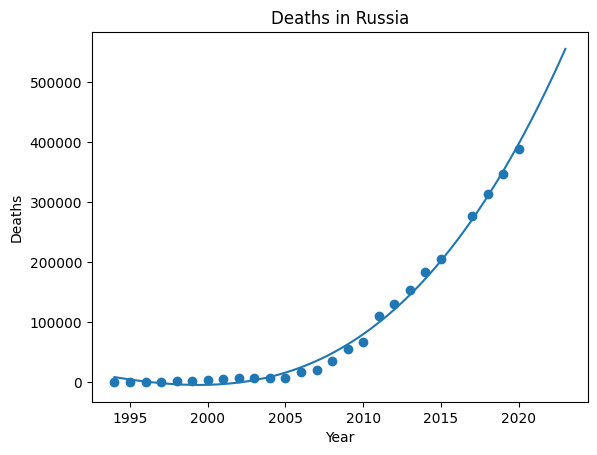

In [53]:
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("./deaths.csv").dropna()
morts = df['Morts']
annes = df['year']
y = morts.to_numpy()
x = annes.to_numpy().astype(float)


# print(y)

mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1994, 2023, 200)


year = 2018
predict = mymodel(year)
print(f'prediction for this year {year} is {predict}')



plt.title('Deaths in Russia')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()